# # LGM VIP JULY 2022 BATCH

# # Task 7 Develop A Neural Network That Can Read Handwriting

In [1]:
import tensorflow as tf
from numpy import unique, argmax
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 11s 1us/step


In [3]:
x_train =x_train.reshape((x_train.shape[0] ,x_train.shape[1], x_train.shape[2],1))
x_test =x_test.reshape((x_test.shape[0] ,x_test.shape[1], x_test.shape[2],1))

In [4]:
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

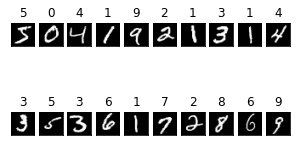

In [5]:
fig=plt.figure(figsize=(5,3))
for i in range(20):
  ax =fig.add_subplot(2,10,i+1 ,xticks=[] ,yticks=[])
  ax.imshow(np.squeeze(x_train[i]), cmap='gray')
  ax.set_title(y_train[i])

In [6]:
img_shape= x_train.shape[1:]
img_shape

(28, 28, 1)

In [7]:
import tensorflow as tf


model = tf.keras.models.Sequential([

  tf.keras.layers.Flatten(input_shape=(28, 28)),

  tf.keras.layers.Dense(128, activation='relu'),

  tf.keras.layers.Dropout(0.2),

  tf.keras.layers.Dense(10)

])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [9]:
from tensorflow.keras.utils import plot_model

plot_model(model, 'model.jpg', show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [10]:
predictions = model(x_train[:1]).numpy()

predictions

array([[-0.5925895 ,  0.74912465, -0.7758319 ,  0.19264743,  0.28585362,
         0.16715841, -0.42472732,  0.6412392 ,  0.04785052,  0.31490916]],
      dtype=float32)

In [11]:
tf.nn.softmax(predictions).numpy()

array([[0.04675402, 0.17886198, 0.03892583, 0.10252814, 0.11254391,
        0.09994783, 0.05529942, 0.16056985, 0.08870713, 0.1158619 ]],
      dtype=float32)

In [12]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], predictions).numpy()
model.compile(optimizer='adam',loss=loss_fn, metrics=['accuracy'])

In [13]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2949 - accuracy: 0.9145
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1433 - accuracy: 0.9565
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1071 - accuracy: 0.9677
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0874 - accuracy: 0.9733
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0760 - accuracy: 0.9761


In [14]:
model.evaluate(x_test,  y_test, verbose=5)

[0.08103401213884354, 0.9775000214576721]

In [15]:
probability_model = tf.keras.Sequential([ model, tf.keras.layers.Softmax() ])
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[1.3314148e-07, 2.2145047e-08, 5.5676314e-06, 1.3247940e-04,
        4.8638719e-12, 1.3100983e-07, 3.7006531e-13, 9.9985731e-01,
        3.1826542e-07, 4.0606751e-06],
       [1.0834697e-08, 3.1673502e-05, 9.9993813e-01, 1.8816323e-05,
        6.6544746e-15, 9.7248258e-06, 2.2809576e-08, 3.6560631e-13,
        1.6414526e-06, 2.0141366e-15],
       [9.9553404e-07, 9.9764508e-01, 3.7230560e-04, 2.5690348e-05,
        3.1900458e-05, 2.9764627e-05, 1.1339162e-05, 1.3386816e-03,
        5.3865096e-04, 5.6636386e-06],
       [9.9690104e-01, 8.8312680e-07, 2.3341281e-03, 7.2387265e-05,
        8.2542056e-06, 6.3459345e-05, 3.6457993e-04, 2.0949006e-04,
        2.8190220e-07, 4.5534933e-05],
       [9.4816876e-08, 7.9220772e-09, 1.6029294e-06, 3.6220549e-09,
        9.9942386e-01, 3.3116825e-07, 1.7169898e-06, 2.2122715e-05,
        1.5368505e-07, 5.4997962e-04]], dtype=float32)>

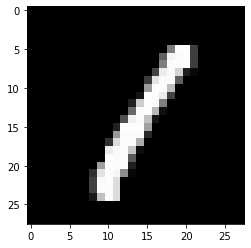

In [16]:
img = x_train[3]
plt.imshow(np.squeeze(img) ,cmap='gray')
plt.show()

In [17]:
img= img.reshape(1, img.shape[0],img.shape[1],img.shape[2])
p= model.predict([img])
print("predicted : {}".format(argmax(p)))

predicted : 1
